In [1]:
# Dependencies
import pandas as pd
import requests
import json
import numpy as np
import gmaps
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


# OpenWeather & gmaps API Keys
from config import open_weather_key
from config import g_key

cities_pd = pd.read_csv("../Resources/census_city.csv")

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# delete the unamed index column
del cities_pd['Unnamed: 0']

cities_pd.head(1000)


,City_State,Clean_City,Population,Lat,Lng
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143
...,...,...,...,...,...
79,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532
80,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958
81,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011
82,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880


In [2]:
# Pull in tempatures into a list to add to dataframe

cities_pd["Max Temp"] = np.nan
cities_pd["Min Temp"] = np.nan

base_url = f"{url}appid={open_weather_key}&units={units}&q="

for index, row in cities_pd.iterrows():
    query_url = base_url + row[1]
    response = requests.get(query_url).json()
    try:
        max_response = response["main"]["temp_max"]
        min_response = response["main"]["temp_min"]
        cities_pd.loc[index, "Max Temp"] = max_response
        cities_pd.loc[index, "Min Temp"] = min_response
        print(f'{row[0]} is completed  with Max Temp: {max_response} Min Temp: {min_response}.')
    except:
        print(f'{row[0]} was not processed...')



Kansas City, Missouri is completed  with Max Temp: 62.01 Min Temp: 59.
Omaha, Nebraska is completed  with Max Temp: 61 Min Temp: 57.2.
Lincoln, Nebraska is completed  with Max Temp: 62.01 Min Temp: 59.
St. Louis, Missouri is completed  with Max Temp: 64.99 Min Temp: 57.2.
Jersey City, New Jersey is completed  with Max Temp: 71.01 Min Temp: 63.
Henderson, Nevada is completed  with Max Temp: 55.4 Min Temp: 53.6.
Las Vegas, Nevada is completed  with Max Temp: 57.2 Min Temp: 54.
Newark, New Jersey is completed  with Max Temp: 71.01 Min Temp: 64.
Albuquerque, New Mexico is completed  with Max Temp: 63 Min Temp: 54.
Buffalo, New York is completed  with Max Temp: 64.99 Min Temp: 61.
Charlotte, North Carolina is completed  with Max Temp: 69.01 Min Temp: 66.
New York, New York is completed  with Max Temp: 69.01 Min Temp: 63.
Raleigh, North Carolina is completed  with Max Temp: 72 Min Temp: 68.
Durham, North Carolina is completed  with Max Temp: 71.01 Min Temp: 66.
Greensboro, North Carolina is 

In [3]:
cities_pd.head()


,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,62.01,59.0
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,61.00,57.2
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,62.01,59.0
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,64.99,57.2
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.0


In [4]:
# clean data frame
cities_pd.dropna(inplace=True)
cities_pd.head(1000)


,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,62.01,59.00
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,61.00,57.20
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,62.01,59.00
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,64.99,57.20
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00
...,...,...,...,...,...,...,...
79,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,73.00,69.01
80,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,64.00,60.80
81,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,63.00,60.01
82,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880,71.01,64.00


In [5]:
# export to csv
cities_pd.to_csv(r'..\resources\weather_city.csv', encoding="utf-8", index=False, header=True)

In [6]:
#Import city temp data
weather_cities_pd = pd.read_csv("../Resources/weather_city.csv")

# Peak battery performance is between 40 & 115 degrees F

weather_cities_pd = weather_cities_pd[weather_cities_pd["Max Temp"] <= 80]
weather_cities_pd = weather_cities_pd[weather_cities_pd["Min Temp"] >= 60]

weather_cities_pd.to_csv(r'..\resources\weather_city_final.csv', encoding="utf-8", index=False, header=True)
weather_cities_pd.head(1000)

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00
7,"Newark, New Jersey",Newark,280463.0,40.735657,-74.172367,71.01,64.00
9,"Buffalo, New York",Buffalo,257518.0,42.886447,-78.878369,64.99,61.00
10,"Charlotte, North Carolina",Charlotte,841611.0,35.227087,-80.843127,69.01,66.00
11,"New York, New York",New York,8443713.0,40.712775,-74.005973,69.01,63.00
12,"Raleigh, North Carolina",Raleigh,457159.0,35.779590,-78.638179,72.00,68.00
13,"Durham, North Carolina",Durham,264310.0,35.994033,-78.898619,71.01,66.00
14,"Greensboro, North Carolina",Greensboro,288719.0,36.072635,-79.791975,66.99,64.40
15,"Toledo, Ohio",Toledo,278193.0,41.652805,-83.537867,63.00,62.01
17,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.99,60.80


In [7]:
# Create a heat map using Temperature as weight
weather_cities_pd = pd.read_csv("../Resources/weather_city_final.csv")
city_locations = weather_cities_pd[["Lat", "Lng"]].astype(float)
city_temp = weather_cities_pd["Max Temp"].astype(float)

# Configure gmaps
gmaps.configure(api_key=g_key)



# Develop figure for heatmap
city_temp_fig = gmaps.figure()

# Develop heat layer for temp
city_temp_layer = gmaps.heatmap_layer(city_locations, weights=city_temp, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add heat layer for humidity
city_temp_fig.add_layer(city_temp_layer)


# Display figure
city_temp_fig


Figure(layout=FigureLayout(height='420px'))

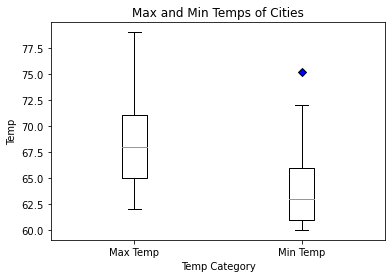

In [8]:
# Great box plots for min and max temperatures to identify outliers visually
max_temp_list = weather_cities_pd["Max Temp"].tolist()
min_temp_list = weather_cities_pd["Min Temp"].tolist()
x_lables = ["Max Temp", "Min Temp"]

#set up box plot and lables
city_temp_boxplot, ax1 = plt.subplots()
ax1.set_title("Max and Min Temps of Cities")
ax1.set_xlabel("Temp Category")
ax1.set_ylabel("Temp")
ax1.set_xticklabels(x_lables)
blue_diamond = dict(markerfacecolor='b', marker='D')

# Put data in the box plot, all four data sets in one graph
city_temp_boxplot = ax1.boxplot([max_temp_list, min_temp_list], flierprops=blue_diamond);

#save figure
plt.savefig("../Resources/city_temp_boxplt.png")

In [9]:
# Remove Outliers and build new data frame and clean csv file
# If the data is in a dataframe, we use pandas to give quartile calculations
min_temp = pd.Series(min_temp_list)

quartiles = min_temp.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.0
The upper quartile of temperatures is: 66.0
The interquartile range of temperatures is: 5.0
The the median of temperatures is: 63.0 
Values below 53.5 could be outliers.
Values above 73.5 could be outliers.


In [10]:
# Population vs. Min Temp

The r-squared is: 0.00015463831508827401


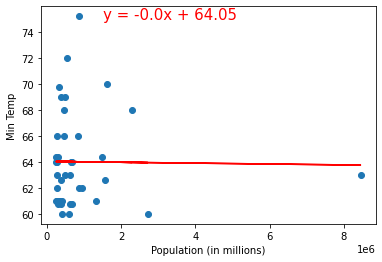

In [11]:
population_list = weather_cities_pd["Population"].tolist()

    # table already set up from last step, just adding back in for reference 
# plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")
# plt.scatter(weight,tumor)
# plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")

x_values = weather_cities_pd["Population"]
y_values = weather_cities_pd['Min Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1500000,75),fontsize=15,color="red")
plt.xlabel('Population (in millions)')
plt.ylabel('Min Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()


    # print graph
plt.show()

In [12]:
# Population vs. Max Temp

The r-squared is: 0.00019018688288294347


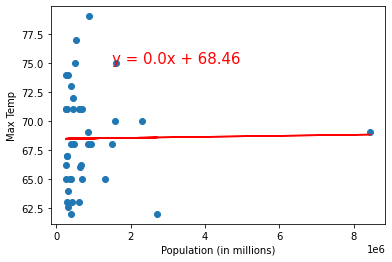

In [13]:
population_list = weather_cities_pd["Population"].tolist()

    # table already set up from last step, just adding back in for reference 
# plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")
# plt.scatter(weight,tumor)
# plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")

x_values = weather_cities_pd["Population"]
y_values = weather_cities_pd['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1500000,75),fontsize=15,color="red")
plt.xlabel('Population (in millions)')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()


    # print graph
plt.show()